#Analysis of Results



---


*Sandor Kruk, Ben Aussel, Steven Dillmann, June 2022, ESA*


---
*Nov 2022: new graphs added for Nature Rev2 - Pablo Garcia Martin*



## Google Drive & Modules

In [1]:
#Mount Google Drive with this Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
#Modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.lines import Line2D
from astropy import units as u
from astropy.coordinates import SkyCoord, GeocentricTrueEcliptic
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
import matplotlib.font_manager as fm
from pylab import cm
from IPython.core.display import HTML
import os

zsh:1: command not found: wget


FORMATTING

In [2]:
#Format Plots
#path = '/content/drive/MyDrive/The_impact_of_satellites_on_Hubble_Space_Telescope_images/Times New Roman Font.ttf'
#fontprop = fm.FontProperties(fname=path)
#fpath = os.path.join(mpl.rcParams['datapath'], '/content/drive/MyDrive/The_impact_of_satellites_on_Hubble_Space_Telescope_images/times-new-roman.ttf')
#prop = fm.FontProperties(fname=fpath)
col1='royalblue'
col2='lightblue'
col2='lightskyblue'
col2='orange'
col3='mediumblue'
col4='crimson'

col1=(12,123,220)
col1=tuple(i/255 for i in col1)
col2=(255,194,10)
col2=tuple(i/255 for i in col2)

col1=(64,176,166)
col1=tuple(i/255 for i in col1)
col2=(225,190,106)
col2=tuple(i/255 for i in col2)

col1=(12,123,220)
col1=tuple(i/255 for i in col1)
col2=(255,194,10)
col2=tuple(i/255 for i in col2)
plt.rcParams.update({'font.family':'STIXGeneral'})
plt.rcParams.update({'font.size': 13})

In [3]:
def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in mpl.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 3;'>{}</div>".format(code))

## Analysis

### Import of Data

In [35]:
#Import the data
data = pd.read_csv("HST_observations_satellite_classifications.csv")

#Separated Dataframes for the two different instruments
data_ACS = data[data["instrument_name"]=="ACS/WFC"]
data_WFC3 = data[data["instrument_name"]=="WFC3/UVIS"]

In [36]:
#Form Dataframe that only contains images with satellites
data_sats = data[data["flag"]=="satellite"]
data_sats_ACS = data_ACS[data_ACS["flag"]=="satellite"]
data_sats_WFC3 = data_WFC3[data_WFC3["flag"]=="satellite"]

### Fraction

In [37]:
def fraction(number_images,number_sats):
    """
    Calculates fraction and uncertainty for given number of images and number of images with satellites.
    Prints the values if the set is only given in one time interval (no array).

    Parameters
    ----------
    number_images: int or ndarray
        The total number of images.
    number_sats: int or ndarray
        The number of images with satellites.

    Returns
    ----------
    frac: float or ndarray
        The fraction of images with satellites.
    u_frac: float or ndarray
        The uncertainty of the fraction.
    """

    u_number_sats = np.sqrt(number_sats + 0.0049*number_sats**2)
    frac = number_sats/number_images
    u_frac = u_number_sats/number_images 
    try:
        print("-- Total number of images with satellites: {:.0f} +- {:.0f}".format(number_sats,u_number_sats))
        print("-- Total number of images: {:.0f}".format(number_images))
        print("-- Fraction of images with satellite trails: ({:.2f} +- {:.2f})%".format(frac*100,u_frac*100))
    except:
        pass
    return frac, u_frac

In [38]:
#Results for all images
print("All images:")
frac, u_frac = fraction(len(data),len(data_sats))
print("ACS:")
frac_ACS, u_frac_ACS = fraction(len(data_ACS),len(data_sats_ACS))
print("WFC3/UVIS:")
frac_WFC3, u_frac_WFC3 = fraction(len(data_WFC3),len(data_sats_WFC3))

All images:
-- Total number of images with satellites: 3072 +- 222
-- Total number of images: 114607
-- Fraction of images with satellite trails: (2.68 +- 0.19)%
ACS:
-- Total number of images with satellites: 2418 +- 176
-- Total number of images: 76056
-- Fraction of images with satellite trails: (3.18 +- 0.23)%
WFC3/UVIS:
-- Total number of images with satellites: 654 +- 52
-- Total number of images: 38551
-- Fraction of images with satellite trails: (1.70 +- 0.14)%


In [39]:
def histogram(data):
    """
    Returns a histogram of the observation date of the images for the different years.

    Parameters
    ----------
    data: pandas.DataFrame
        The data that is analysed.
    
    Returns
    ----------
    The resulting histogram.
    """
    
    return np.histogram(data["start_time_mjd"],bins=bins_mjd)[0]

#Definition of the time intervals
bins_mjd = [52275,52640,53005,53371,53736,54101,54466,54832,55197,55562,55927,56293,56658,57023,57388,57754,58119,58484,58849,59215,59580]
years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

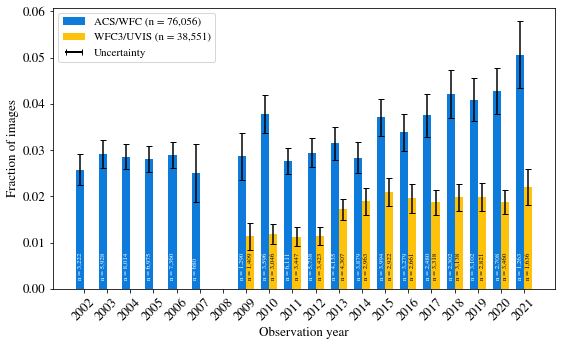

In [40]:
#For the different years
frac_yrs_ACS, u_frac_yrs_ACS = fraction(histogram(data_ACS),histogram(data_sats_ACS))
frac_yrs_WFC3, u_frac_yrs_WFC3 = fraction(histogram(data_WFC3),histogram(data_sats_WFC3))

plt.figure(figsize=(8,5))
width = 0.35
capsize = 3
bar_ACS = plt.bar(np.array(years)-width/2,frac_yrs_ACS, width=width, yerr=u_frac_yrs_ACS,capsize=capsize,label='ACS/WFC (n = '+str('{:,}'.format(histogram(data_ACS).sum()))+')',color=col1)
bar_WFC3 = plt.bar(np.array(years)+width/2,frac_yrs_WFC3, width=width, yerr=u_frac_yrs_WFC3,capsize=capsize,label='WFC3/UVIS (n = '+str('{:,}'.format(histogram(data_WFC3).sum()))+')',color=col2)
plt.xticks(years,rotation=45)
plt.xlabel("Observation year")
plt.ylabel("Fraction of images")
#plt.title("HST raw images with satellite trails by instrument")
error_legend = Line2D([0], [0], color='black', lw=2, label = 'Uncertainty', marker ='|')
plt.legend(loc="upper left",
           handles=[bar_ACS,bar_WFC3,error_legend],
           numpoints = 2,
           fontsize=11)
for i,rect in enumerate(bar_ACS):
  plt.text(rect.get_x()+rect.get_width()/2,rect.get_y()+0.002,'n = '+str('{:,}'.format(histogram(data_ACS)[i])), ha="center", va="bottom",rotation=90,size=7,color='white')
for i,rect in enumerate(bar_WFC3):
  if i<7:
    continue
  else:
    plt.text(rect.get_x()+rect.get_width()/2,rect.get_y()+0.002,'n = '+str('{:,}'.format(histogram(data_WFC3)[i])), ha="center", va="bottom",rotation=90,size=7,color='black')
plt.tight_layout()
plt.savefig("Figures/fraction_of_satellites_by_year.pdf",dpi=500, bbox_inches='tight')

In [41]:
print("Fractions for different time intervals:")
print("ACS: 2002-2005")
_,_= fraction(len(data_ACS[data_ACS["start_time_mjd"]<53736]),\
              len(data_sats_ACS[data_sats_ACS["start_time_mjd"]<53736]))
print("ACS: 2018-2021")
_,_= fraction(len(data_ACS[data_ACS["start_time_mjd"] >= 58119]),\
              len(data_sats_ACS[data_sats_ACS["start_time_mjd"] >= 58119]))
print("---------------")
print("WFC3: 2009-2012")
_,_= fraction(len(data_WFC3[data_WFC3["start_time_mjd"]<56293]),\
              len(data_sats_WFC3[data_sats_WFC3["start_time_mjd"]<56293]))
print("WFC3: 2018-2021")
_,_= fraction(len(data_WFC3[data_WFC3["start_time_mjd"] >= 58119]),\
              len(data_sats_WFC3[data_sats_WFC3["start_time_mjd"] >= 58119]))

Fractions for different time intervals:
ACS: 2002-2005
-- Total number of images with satellites: 681 +- 54
-- Total number of images: 24139
-- Fraction of images with satellite trails: (2.82 +- 0.23)%
ACS: 2018-2021
-- Total number of images with satellites: 404 +- 35
-- Total number of images: 9375
-- Fraction of images with satellite trails: (4.31 +- 0.37)%
---------------
WFC3: 2009-2012
-- Total number of images with satellites: 130 +- 15
-- Total number of images: 11325
-- Fraction of images with satellite trails: (1.15 +- 0.13)%
WFC3: 2018-2021
-- Total number of images with satellites: 219 +- 21
-- Total number of images: 11055
-- Fraction of images with satellite trails: (1.98 +- 0.19)%


### Filter


In [42]:
def hist_filters(data,filters,filters_instrument):
    """
    Counts the number of images for the different filters given by the array. 
    Returns an array containing the corresponding numbers.

    Parameters
    ----------
    data: pandas.DataFrame
        The data that is analysed.
    filters: list
        A list that contains strings of the examined filter names.
    filters_instrument: list
        A list that contains strings of the examined filter names for the given instrument.

    Returns
    ----------
    numbers: list
        The number of images for each given filter (list filters).
    """
    
    numbers = np.zeros(len(filters))
    for i in range(data.index[-1]):
        try:
            value = data["instrument_configuration"][i].split("|")[6].split("=")[1].replace(";","").replace("CLEAR1L","").replace("CLEAR2L","")\
            .replace("POL0V","").replace("POL120V","").replace("POL60V","").replace("POL0UV","").replace("POL60UV","").replace("POL120UV","")
            if value == "":
                continue
            elif value in filters_instrument:
                for j in range(len(filters)):
                    if value == filters[j]:
                        numbers[j] = numbers[j] + 1
        except:
            continue
    return numbers

In [43]:
#Filter names
filter_names = ["F225W","F275W","F336W","F350LP","F435W","F475W","F555W","F606W","F658N","F775W","F814W","F850LP"]
filter_names_ACS = ["F435W","F475W","F555W","F606W","F658N","F775W","F814W","F850LP"]
filter_names_WFC3 = ["F225W","F275W","F336W","F350LP","F475W","F555W","F606W","F814W"]

#ACS
filters_ACS = hist_filters(data_ACS,filter_names,filter_names_ACS)
filters_sats_ACS = hist_filters(data_sats_ACS,filter_names,filter_names_ACS)
frac_filters_ACS, u_frac_filters_ACS = fraction(filters_ACS,filters_sats_ACS)

#WFC3
filters_WFC3 = hist_filters(data_WFC3,filter_names,filter_names_WFC3)
filters_sats_WFC3 = hist_filters(data_sats_WFC3,filter_names,filter_names_WFC3)
frac_filters_WFC3, u_frac_filters_WFC3 = fraction(filters_WFC3,filters_sats_WFC3)

In [44]:
print("Fraction F275W: {:.4f} +- {:.4f}".format(frac_filters_WFC3[1],u_frac_filters_WFC3[1]))

print("Mean fraction of images with filters F606W, F775W, F814W:")
sats_high_wl = filters_sats_ACS[7]+filters_sats_ACS[9]+filters_sats_ACS[10]\
                    +filters_sats_WFC3[7]+filters_sats_WFC3[9]+filters_sats_WFC3[10]
high_wl = filters_ACS[7]+filters_ACS[9]+filters_ACS[10]+filters_WFC3[7]+filters_WFC3[9]+filters_WFC3[10]
frac_high_wl, u_frac_high_wl = fraction(high_wl,sats_high_wl)

Fraction F275W: 0.0014 +- 0.0006
Mean fraction of images with filters F606W, F775W, F814W:
-- Total number of images with satellites: 2095 +- 154
-- Total number of images: 62802
-- Fraction of images with satellite trails: (3.34 +- 0.24)%


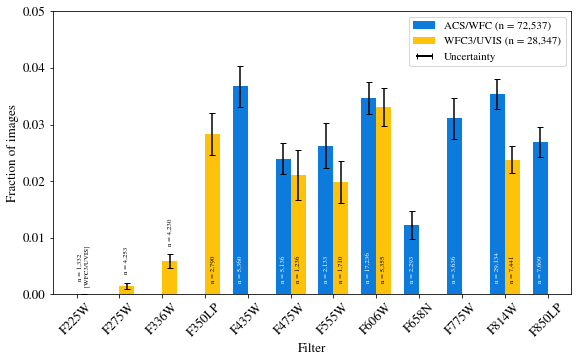

In [45]:
#Plot
plt.figure(figsize=(8,5))
width = 0.35
capsize = 3
x = np.arange(len(filter_names))
bar_ACS = plt.bar(x-width/2,frac_filters_ACS, width=width, yerr=u_frac_filters_ACS,capsize=capsize,label='ACS/WFC (n = '+str('{:,}'.format(int(filters_ACS.sum())))+')',color=col1)
bar_WFC3 = plt.bar(x+width/2,frac_filters_WFC3, width=width, yerr=u_frac_filters_WFC3,capsize=capsize,label='WFC3/UVIS (n = '+str('{:,}'.format(int(filters_WFC3.sum())))+')',color=col2)
plt.xticks(x,filter_names,rotation=45)
plt.ylim(0,0.05)
plt.tight_layout()
error_legend = Line2D([2], [2], color='black', lw=2, label = 'Uncertainty', marker ='|')
plt.legend(loc="upper right",
           handles=[bar_ACS,bar_WFC3,error_legend],
           numpoints = 2,
           fontsize=11)
plt.xlabel("Filter")
plt.ylabel("Fraction of images")
for i,rect in enumerate(bar_ACS):
  plt.text(rect.get_x()+rect.get_width()/2,rect.get_y()+0.002,'n = '+str('{:,}'.format(int(filters_ACS[i]))), ha="center", va="bottom",rotation=90,size=7,color='white')
for i,rect in enumerate(bar_WFC3):
  if i==0:
    plt.text(rect.get_x()+rect.get_width()/2,rect.get_y()+0.001,'n = '+str('{:,}'.format(int(filters_WFC3[i])))+'\n [WFC3/UVIS]', ha="center", va="bottom",rotation=90,size=7,color='black')
  elif i==1:
    plt.text(rect.get_x()+rect.get_width()/2,rect.get_y()+0.0035,'n = '+str('{:,}'.format(int(filters_WFC3[i]))), ha="center", va="bottom",rotation=90,size=7,color='black')
  elif i==2:
    plt.text(rect.get_x()+rect.get_width()/2,rect.get_y()+0.0085,'n = '+str('{:,}'.format(int(filters_WFC3[i]))), ha="center", va="bottom",rotation=90,size=7,color='black')
  elif i==4 or i==8 or i==9 or i==11:
    continue
  else:
    plt.text(rect.get_x()+rect.get_width()/2,rect.get_y()+0.002,'n = '+str('{:,}'.format(int(filters_WFC3[i]))), ha="center", va="bottom",rotation=90,size=7,color='black')
#plt.title("HST raw images with satellite trails by filter",fontproperties=prop)
plt.savefig("Figures/fraction_of_satellites_by_filter.pdf",dpi=500, bbox_inches='tight')

### Normalization

#### Calculation

In [46]:
#Using only broadband filterswith (lambda > 400nm)
used_filters = ["F435W","F438W","F475W","F555W","F600LP","F606W","F625W","F775W","F814W","F850LP"]

def chance(data,data_sats,fov_value,bins_mjd):
    """
    Normalizes the fractions. Divides the number of satellite trails on the images with satellites 
    by the total exposure time. Only images using the full FOV and broadband filters 
    with lambda > 400nm are considered. Returns the chance of seeing a satellite for a typical 
    image with full FOV by multiplying with the mean exposure time of the instrument.

    Parameters
    ----------
    data: pandas.DataFrame
        The data of all images.
    data_sats: pandas.DataFrame
        The data of images with satellites.
    fov_value: float
        The threshold value for the fov_size parameter in the metadata (for full FOV).
    bins_mjd: list
        The bins for the (time) histogram.

    Returns
    ----------
    chance: ndarray
        The chance of seeing a satellite as a histogram.
    u_chance: ndarray
        The corresponding uncertainties.
    """
    
    #Number of satellites trails
    hist_sats_norm = np.histogram(data_sats[data_sats["fov_size"]>fov_value][data_sats["instrument_configuration"]\
                            .str.contains('|'.join(used_filters))]["start_time_mjd"],bins=bins_mjd,\
                            weights=data_sats[data_sats["fov_size"]>fov_value][data_sats["instrument_configuration"]\
                            .str.contains('|'.join(used_filters))]["no_sats"])

    #Total exposure time
    hist_exp = np.histogram(data[data["fov_size"]>fov_value][data["instrument_configuration"].str.contains('|'.join(used_filters))]\
                            ["start_time_mjd"],bins=bins_mjd,weights=data[data["fov_size"]>fov_value][data["instrument_configuration"]\
                            .str.contains('|'.join(used_filters))]["exposure_duration"])

    #Calculate mean exposure time
    exp_times = data[data["fov_size"]>fov_value][data["instrument_configuration"].str.contains('|'.join(used_filters))]["exposure_duration"]
    exp_time_mean = np.mean(exp_times)
    exp_time_std = np.std(exp_times,ddof=1)/np.sqrt(len(exp_times))
    print("-- Mean exposure time: {:.1f} +- {:.1f} s".format(exp_time_mean,exp_time_std))

    #Calculate chance
    chance = hist_sats_norm[0]*exp_time_mean/hist_exp[0]
    u_chance = np.sqrt((hist_sats_norm[0]+0.0049*hist_sats_norm[0]**2)*exp_time_mean**2/hist_exp[0]**2+hist_sats_norm[0]**2*exp_time_std**2/hist_exp[0]**2)
    
    return chance, u_chance

In [47]:
print("ACS:")
chance_ACS, u_chance_ACS = chance(data_ACS,data_sats_ACS,0.083,bins_mjd)
print("WFC3:")
chance_WFC3, u_chance_WFC3 = chance(data_WFC3,data_sats_WFC3,0.066,bins_mjd)
chance_WFC3_n, u_chance_WFC3_n = chance_WFC3*202/160, u_chance_WFC3*202/160 #Normalize

ACS:
-- Mean exposure time: 673.2 +- 1.8 s
WFC3:
-- Mean exposure time: 679.9 +- 3.2 s


In [48]:
bins_2021 = [54832,59215,59580]
print("ACS:")
chance_ACS_2021, u_chance_ACS_2021 = chance(data_ACS,data_sats_ACS,0.083,bins_2021)
print("-- Chance of seeing a satellite 2009-2020: ({:.2f} +- {:.2f})%".format(chance_ACS_2021[0]*100,u_chance_ACS_2021[0]*100))
print("-- Chance of seeing a satellite 2021: ({:.2f} +- {:.2f})%".format(chance_ACS_2021[1]*100,u_chance_ACS_2021[1]*100))
print("--> Increase of {:.0f}%".format(chance_ACS_2021[1]/chance_ACS_2021[0]*100-100))
print("WFC3:")
chance_WFC3_2021, u_chance_WFC3_2021 = chance(data_WFC3,data_sats_WFC3,0.066,bins_2021)
chance_WFC3_2021_n, u_chance_WFC3_2021_n = chance_WFC3_2021*202/160, u_chance_WFC3_2021*202/160
print("-- Chance of seeing a satellite 2009-2020: ({:.2f} +- {:.2f})%".format(chance_WFC3_2021_n[0]*100,u_chance_WFC3_2021_n[0]*100))
print("-- Chance of seeing a satellite 2021: ({:.2f} +- {:.2f})%".format(chance_WFC3_2021_n[1]*100,u_chance_WFC3_2021_n[1]*100))
print("--> Increase of {:.0f}%".format(chance_WFC3_2021_n[1]/chance_WFC3_2021_n[0]*100-100))

ACS:
-- Mean exposure time: 673.2 +- 1.8 s
-- Chance of seeing a satellite 2009-2020: (3.69 +- 0.28)%
-- Chance of seeing a satellite 2021: (5.86 +- 0.87)%
--> Increase of 59%
WFC3:
-- Mean exposure time: 679.9 +- 3.2 s
-- Chance of seeing a satellite 2009-2020: (3.24 +- 0.29)%
-- Chance of seeing a satellite 2021: (5.54 +- 1.15)%
--> Increase of 71%


#### Chance

In [49]:
data_ACS_chanceplot_legend = data_ACS[data_ACS["fov_size"]>0.083][data_ACS["instrument_configuration"].str.contains('|'.join(used_filters))]
data_WFC3_chanceplot_legend = data_WFC3[data_WFC3["fov_size"]>0.066][data_WFC3["instrument_configuration"].str.contains('|'.join(used_filters))]

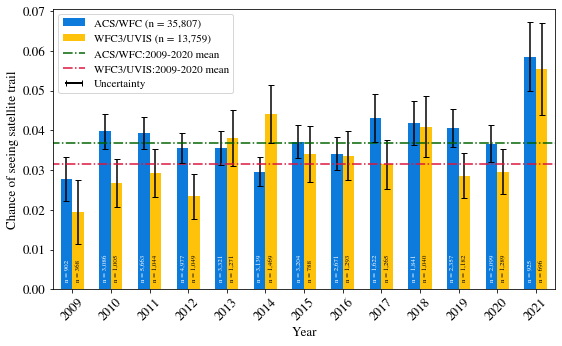

In [51]:
plt.figure(figsize=(8,5))
width = 0.3
capsize = 3
bar_ACS = plt.bar(np.array(years)-width/2,chance_ACS, width=width, yerr=u_chance_ACS,capsize=capsize,label='ACS/WFC (n = '+str('{:,}'.format(histogram(data_ACS_chanceplot_legend)[7:].sum()))+')',color=col1)
bar_WFC3 = plt.bar(np.array(years)+width/2,chance_WFC3_n, width=width, yerr=u_chance_WFC3_n,capsize=capsize,label='WFC3/UVIS (n = '+str('{:,}'.format(histogram(data_WFC3_chanceplot_legend)[7:].sum()))+')',color=col2)
line_ACS = plt.hlines(np.mean(chance_ACS[7:19]),2008,2022,linestyles="-.",label="ACS/WFC:2009-2020 mean",color="darkgreen")
line_WFC3 = plt.hlines(np.mean(chance_WFC3_n[7:19]),2008,2022,linestyles="-.",label="WFC3/UVIS:2009-2020 mean",color=col4)
plt.xlabel("Year")
plt.ylabel("Chance of seeing satellite trail")
error_legend = Line2D([2], [2], color='black', lw=2, label = 'Uncertainty', marker ='|')
plt.legend(loc="upper left",
           fontsize=11,
           handles=[bar_ACS,bar_WFC3,line_ACS,line_WFC3,error_legend],
           numpoints = 2)
for i,rect in enumerate(bar_ACS):
  if i<7:
    continue
  else:
    plt.text(rect.get_x()+rect.get_width()/2,rect.get_y()+0.002,'n = '+str('{:,}'.format(histogram(data_ACS_chanceplot_legend)[i])), ha="center", va="bottom",rotation=90,size=7,color='white')
for i,rect in enumerate(bar_WFC3):
  if i<7:
    continue
  else:
    plt.text(rect.get_x()+rect.get_width()/2,rect.get_y()+0.002,'n = '+str('{:,}'.format(histogram(data_WFC3_chanceplot_legend)[i])), ha="center", va="bottom",rotation=90,size=7,color='black')
plt.tight_layout()
plt.xticks(years,rotation=45)
plt.xlim(2008.5,2021.5)
plt.tight_layout()
plt.savefig("Figures/chance_of_seeing_satellite_by_year.pdf",dpi=500, bbox_inches='tight')

### Fraction of satellites by sky position
Using Sandors script: https://github.com/sandorkruk/HST_satellites/blob/main/HST_satellite_analysis.ipynb

In [52]:
exclude_filters = ["F275W","F225W","F200L","F280N","F300X","F218N"]
data_sky = data.drop(data[data["instrument_configuration"].str.contains('|'.join(exclude_filters))].index)
data_sats_sky = data_sats.drop(data_sats[data_sats["instrument_configuration"].str.contains('|'.join(exclude_filters))].index)

In [53]:
multi_satellite = data_sats_sky

for i in range(len(multi_satellite)):
    if multi_satellite[i:i+1]["no_sats"].to_numpy() >= 2:
        repeat = int(multi_satellite[i:i+1]["no_sats"].to_numpy())
        for j in range(repeat-1):
            multi_satellite = multi_satellite.append(multi_satellite[i:i+1])

Number of satellite trails: 3194
Number of images: 107832


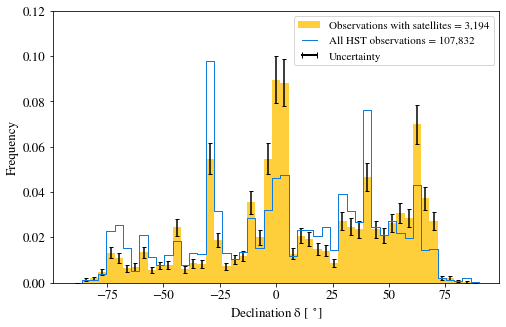

In [55]:
plt.figure(figsize=(8,5))

decs = np.linspace(-90,90,50)
width = np.diff(decs)[0]
hist_dec_sats = np.histogram(multi_satellite["dec"],bins=decs)
hist_dec = np.histogram(data_sky["dec"],bins=decs)

#Density (Frequency) --> Divide by number of total images
dec_distr_sats = hist_dec_sats[0]/hist_dec_sats[0].sum()
u_dec_distr_sats = np.sqrt((np.sqrt(hist_dec_sats[0]+0.0049*hist_dec_sats[0]**2)/(hist_dec_sats[0].sum()))**2+\
                    (np.sqrt(hist_dec_sats[0].sum()+0.0049*hist_dec_sats[0].sum()**2)*hist_dec_sats[0]/(hist_dec_sats[0].sum()**2))**2)
dec_distr = hist_dec[0]/(hist_dec[0].sum())

thebar = plt.bar(hist_dec_sats[1][:-1]+width/2,dec_distr_sats,width=width,label="Observations with satellites = "+str('{:,}'.format(len(multi_satellite))),\
        color=col2,alpha=0.8,yerr=u_dec_distr_sats,capsize=2)
thestep = plt.step(hist_dec[1][:-1]+width,dec_distr,label="All HST observations", alpha=1, color=col1,linewidth=1)

print("Number of satellite trails:",len(multi_satellite))
print("Number of images:",len(data_sky))
plt.xlabel("Declination \u03B4 [ $^{\circ}$]")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()
error_legend = Line2D([2], [2], color='black', lw=2, label = 'Uncertainty', marker ='|')
line_legend = Line2D([2], [2], color=col1, lw=1, label = 'All HST observations = '+str('{:,}'.format(len(data_sky))))
plt.legend(loc="upper right",
           handles=[thebar,line_legend,error_legend],
           numpoints = 2,
           fontsize=11)
plt.ylim(0,0.12)
plt.savefig("Figures/satellite_distribution_declination.pdf",dpi=500, bbox_inches='tight')

Number of satellite trails: 3194
Number of images: 107832


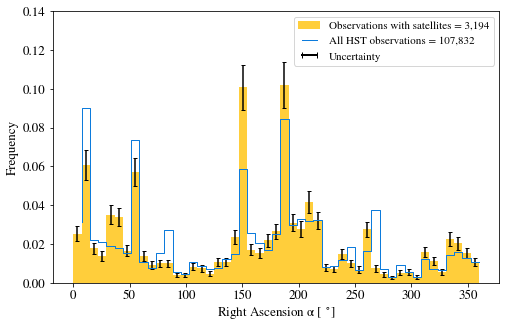

In [56]:
plt.figure(figsize=(8,5))
ras = np.linspace(0,360,50)
width = np.diff(ras)[0]
hist_ra_sats = np.histogram(multi_satellite["ra"],bins=ras)
hist_ra = np.histogram(data_sky["ra"],bins=ras)

#Density (Frequency) --> Divide by number of total images
ra_distr_sats = hist_ra_sats[0]/(hist_ra_sats[0].sum())
u_ra_distr_sats = np.sqrt((np.sqrt(hist_ra_sats[0]+0.0049*hist_ra_sats[0]**2)/(hist_ra_sats[0].sum()))**2+\
                    (np.sqrt(hist_ra_sats[0].sum()+0.0049*hist_ra_sats[0].sum()**2)*hist_ra_sats[0]/(hist_ra_sats[0].sum()**2))**2)
ra_distr = hist_ra[0]/(hist_ra[0].sum())

thebar = plt.bar(hist_ra_sats[1][:-1]+width/2,ra_distr_sats,width=width,label="Observations with satellites = "+str('{:,}'.format(len(multi_satellite))),\
        color =col2,alpha=0.8,yerr=u_ra_distr_sats,capsize=2)
plt.step(hist_ra[1][:-1]+width,ra_distr,label="All HST observations", alpha=1, color=col1,linewidth=1)

print("Number of satellite trails:",len(multi_satellite))
print("Number of images:",len(data_sky))
plt.xlabel("Right Ascension \u03B1 [ $^{\circ}$]")
plt.ylabel("Frequency")
error_legend = Line2D([2], [2], color='black', lw=2, label = 'Uncertainty', marker ='|')
line_legend = Line2D([2], [2], color=col1, lw=1, label = 'All HST observations = '+str('{:,}'.format(len(data_sky))))
plt.legend(loc="upper right",
           handles=[thebar,line_legend,error_legend],
           numpoints = 2,
           fontsize=11)
plt.ylim(0,0.14)
#plt.yticks(np.arange(0, 0.0200001, step=0.005))
plt.savefig("Figures/satellite_distribution_right_ascension.pdf",dpi=500, bbox_inches='tight')


### Plot HST pointings in HEALPix, Mollweide projection

Using Sandors script: https://github.com/sandorkruk/HST_satellites/blob/main/HST_satellite_analysis.ipynb

In [57]:
!pip install healpy

     |████████████████████████████████| 7.0 MB 182 kB/s eta 0:00:01     |█████████████████               | 3.7 MB 190 kB/s eta 0:00:18


In [58]:
from astropy.coordinates import SkyCoord
import healpy as hp

def cat2hpx(ra, dec, nside, radec=True):
    """
    Convert a catalogue to a HEALPix map of number counts per resolution
    element.

    Parameters
    ----------
    lon, lat : (ndarray, ndarray)
        Coordinates of the sources in degree. If radec=True, assume input is in the icrs
        coordinate system. Otherwise assume input is glon, glat

    nside : int
        HEALPix nside of the target map

    radec : bool
        Switch between R.A./Dec and glon/glat as input coordinate system.

    Return
    ------
    hpx_map : ndarray
        HEALPix map of the catalogue number counts in Galactic coordinates

    """

    npix = hp.nside2npix(nside)

    l, b = ra, dec

    # conver to theta, phi
    theta = np.radians(90-b)
    phi = np.radians(l)

    # convert to HEALPix indices
    indices = hp.ang2pix(nside, theta, phi)

    idx, counts = np.unique(indices, return_counts=True)

    # fill the fullsky map
    hpx_map = np.zeros(npix, dtype=int)
    hpx_map[idx] = counts

    return hpx_map

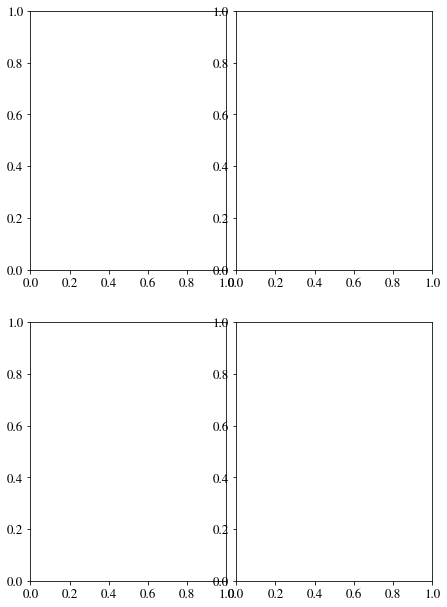

In [59]:
from matplotlib.colors import LinearSegmentedColormap
col1=(12,123,220)
col1=tuple(i/255 for i in col1)

col2=(73,141,168)
col2=tuple(i/255 for i in col2)

col3=(134,159,115)
col3=tuple(i/255 for i in col3)

col4=(194,176,63)
col4=tuple(i/255 for i in col4)

col5=(255,194,10)
col5=tuple(i/255 for i in col5)

w=(255,255,255)
w=tuple(i/255 for i in w)


colors = [col1,col2,col3,col4,col5]  # R -> G -> B
colors = [col1,w,col5]  # R -> G -> B
n_bins = [0, 25, 50, 75, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, axs.flat):
    # Create the colormap
    cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
    
def mollweide_plot(hpx_map,title_text,max_val):
    """
    Creates the mollweide plot for a given dataset.

    Parameters
    ----------
    hpx_map: ndarray
        HEALPix map of the catalogue number counts in Galactic coordinates.
    title_text: string
        The text of the title of the plot.
    max_val: float
        The maximum value of the scaling of the colormap. If it is 0, than matplotlib sets it itself. 
    """
    
    if max_val == 0:
        hp.mollview(hpx_map, unit="", rot=(0,0,0), title=title_text, cmap=cmap, flip='astro',return_projected_map=True, badcolor="gray")
    else:
        hp.mollview(hpx_map, unit="", rot=(0,0,0), title=title_text, cmap=cmap, flip='astro',return_projected_map=True, min=0,max=max_val, badcolor="gray")

    hp.projtext(180, 60, '$60^{\circ}$', lonlat=True)
    hp.projtext(180, 30, '$30^{\circ}$', lonlat=True)
    hp.projtext(180, 0, '$0^{\circ}$', lonlat=True)
    hp.projtext(180, -60, '$-60^{\circ}$', lonlat=True)
    hp.projtext(180, -30, '$-30^{\circ}$', lonlat=True)
    hp.projtext(0, 0, '$0^{\circ}$', lonlat=True)
    hp.projtext(30, 0, '$30^{\circ}$', lonlat=True)
    hp.projtext(60, 0, '$60^{\circ}$', lonlat=True)
    hp.projtext(90, 0, '$90^{\circ}$', lonlat=True)
    hp.projtext(120, 0, '$120^{\circ}$', lonlat=True)
    hp.projtext(150, 0, '$150^{\circ}$', lonlat=True)
    hp.projtext(179, 0, '$180^{\circ}$', lonlat=True)
    hp.projtext(0, 0, '$0^{\circ}$', lonlat=True)
    hp.projtext(210, 0, '$210^{\circ}$', lonlat=True)
    hp.projtext(240, 0, '$240^{\circ}$', lonlat=True)
    hp.projtext(270, 0, '$270^{\circ}$', lonlat=True)
    hp.projtext(300, 0, '$300^{\circ}$', lonlat=True)
    hp.projtext(330, 0, '$330^{\circ}$', lonlat=True)
    hp.graticule()

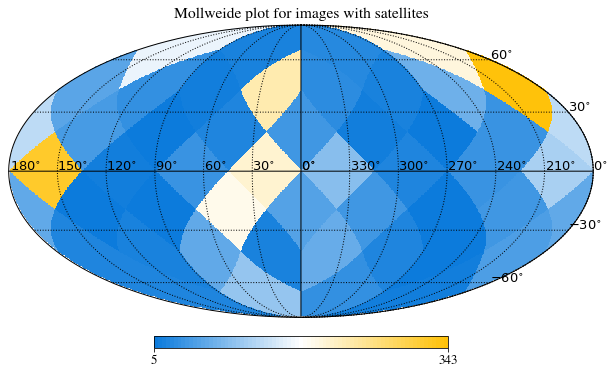

In [60]:
#Mollweide projection of pointings with satellite crossings
ra_sats = multi_satellite["ra"].to_frame()
dec_sats = multi_satellite["dec"].to_frame()

hpx_map_sats = cat2hpx(ra_sats, dec_sats, nside=2, radec=False)

mollweide_plot(hpx_map_sats,title_text="Mollweide plot for images with satellites",max_val=0)

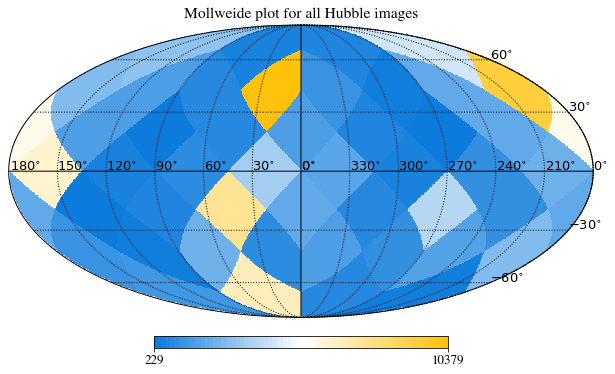

In [61]:
#Mollweide projection of all HST observations
ra_all = data_sky["ra"].to_frame()
dec_all = data_sky["dec"].to_frame()

hpx_map_all = cat2hpx(ra_all, dec_all, nside=2, radec=False)

mollweide_plot(hpx_map_all,title_text="Mollweide plot for all Hubble images",max_val=0)

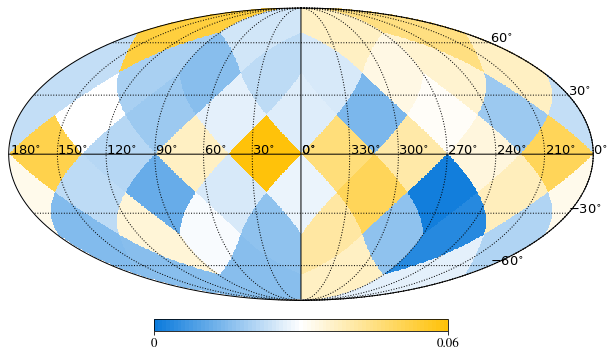

In [63]:
#Fraction
#calculate fraction by healpix
fraction_map = hpx_map_sats/hpx_map_all

#mask pixels with <100 observations
masked_map = np.zeros(len(fraction_map))
masked_map[hpx_map_all<100] = 1

m = hp.ma(fraction_map)
m.mask = masked_map

mollweide_plot(m,title_text="",max_val=0.06)
ax.set_xlabel(r'$\mathrm{RA[\degree]}$')
plt.savefig("Figures/Mollwide_satellite_sky_distribution.pdf", bbox_inches='tight',transparent=True, dpi=300)

# Calculating the probability to encountering a satellite

In [64]:
def NbrIllumSat(hs):

  RE = 6371 #Earth Radius
  RH = 6909 #Radius of Hubble (RE+538km)
  RS = RE + hs #Radius of satellite (RE+1000km)

  # calculating the angle by which the horizon is lowered for HST
  #theta = np.arccos(RE/RH)
  theta = np.arccos(RE/RH) - np.deg2rad((15.5 + 7.6)/2)
  # theta = 0

  # calculating the visible fraction of satellites to HST

  # See Appendix for the defition of a, b, c
  b = np.sqrt(RS**2-RE**2)+RH*np.sin(theta)
  a = b*RE/RH
  c = np.sqrt(RS**2-a**2)
  f_visible = 1/2*(1-c/RS)

  # calculating the illuminated fraction of satellites (i.e. not in the shadow of the Earth)

  alpha = np.arctan(RE/RS)
  alpha_d = alpha*360/(2*np.pi)

  f_illuminated = 1 -2*alpha_d/360
  #if True : # print the info
  #  print('Angle by which horizon is lowered for HST:', theta*360/(2*np.pi), 'degrees')
  #  print('Fraction of satellites at altitude ',hs,' km, visible to HST:', f_visible*100, '%')
  #  print('Fraction of illuminated satellites at altitude ',hs,' km:', f_illuminated*100, '%')
  #  print('Fraction of illuminated satellites at altitude', hs ,' km:', f_illuminated * f_visible*100, '%')
  return f_illuminated * f_visible

In [65]:
def probability(hs, Nsat, t):
  G = 6.6743e-11
  M = 5.972e24
  RE = 6371
  a_ACS = 200 #arcsec - ACS field of view size
  a_UVIS = 160 #arcsec - WFC3/UVIS field of view size
  t_sec = t*60
  f = NbrIllumSat(hs)

  #angular velocity calculation
  w = np.sqrt((G*M)/((RE+hs)*10**3)**3)*206264.806
  #print("Angular velocity omega in arcsec/second:", w)

  P_ACS = (Nsat * w * f * a_ACS * t_sec)/(4*np.pi*206265**2)
  P_UVIS = (Nsat * w * f * a_UVIS * t_sec)/(4*np.pi*206265**2)

  #if True : # print the info
  #  print('Fraction of illuminated satellites at altitude', hs ,' km and visible to Hubble:', NbrIllumSat(hs)*100, '%')
  #  print('Average likelihood of satellite crossing ACS', P_ACS*100, '%')
  #  print('Average likelihood of satellite crossing WFC3/UVIS', P_UVIS*100, '%')

  return P_ACS, P_UVIS

Forward modelling when Starlink, OneWeb, Amazon/Kuiper, Telesat satellites will be launched

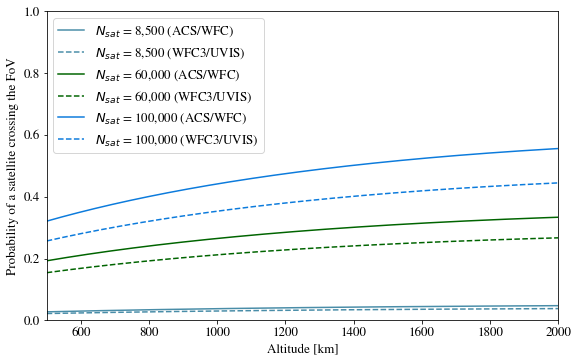

In [ ]:
plt.figure(figsize=(8,5))

hsall = np.linspace(500,2000,1000)
Nsat=[8500,60000,100000]
t_min=11

P=probability(hsall,Nsat[0],t_min)
plt.plot(hsall, P[0], "-", label="$\it{N_{sat}}$ = 8,500 (ACS/WFC)", color=col2)
plt.plot(hsall, P[1], "--", label="$N_{sat}$ = 8,500 (WFC3/UVIS)", color=col2)

P=probability(hsall,Nsat[1],t_min)
plt.plot(hsall, P[0], "-", label="$N_{sat}$ = 60,000 (ACS/WFC)", color="darkgreen")
plt.plot(hsall, P[1], "--", label="$N_{sat}$ = 60,000 (WFC3/UVIS)", color="darkgreen")

P=probability(hsall,Nsat[2],t_min)
plt.plot(hsall, P[0], "-", label="$N_{sat}$ = 100,000 (ACS/WFC)", color=col1)
plt.plot(hsall, P[1], "--", label="$N_{sat}$ = 100,000 (WFC3/UVIS)", color=col1)
plt.xlim([500,2000])
plt.ylim([0,1])
#plt.yscale("log")
plt.legend(loc="upper left")
plt.tight_layout()
plt.xlabel("Altitude [km]")
plt.ylabel("Probability of a satellite crossing the FoV")

plt.savefig("Figures/Probability_satellite_crossing_FOV.pdf",dpi=300, bbox_inches='tight')

In [ ]:
# current no. of satellites
N_current = 8500 # number of satellites
print("Current number of satellites:",N_current)

hs =  1500 #km altitude of satellite
a_ACS = 202 #arcsec - ACS field of view size
a_UVIS = 160 #arcsec - WFC3/UVIS field of view size
t = 11*60 #seconds - average exposure time
f = NbrIllumSat(hs) # fraction of visible satellites - estimated in the appendix 
print("Fraction of illuminated and visible satellites:", f*100, '%')

G = 6.6743e-11
M = 5.972e24
RE = 6371

#angular velocity calculation
w = np.sqrt((G*M)/((RE+hs)*10**3)**3)*206264.806
print("Angular velocity omega in arcsec/second:", w)

## Likelihood of satellite crossing
P_ACS = (N_current * w * f * a_ACS * t)/(4*np.pi*206265**2)
P_UVIS = (N_current * w * f * a_UVIS * t)/(4*np.pi*206265**2)

print('Average likelihood of satellite crossing ACS', P_ACS*100, '%')
print('Average likelihood of satellite crossing WFC3/UVIS', P_UVIS*100, '%')

Current number of satellites: 8500
Fraction of illuminated and visible satellites: 11.153240236496494 %
Angular velocity omega in arcsec/second: 186.484622357393
Average likelihood of satellite crossing ACS 4.408566200433764 %
Average likelihood of satellite crossing WFC3/UVIS 3.491933624105952 %
